In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [113]:
raw = pd.read_csv("/Users/dungnguyen/Desktop/WORKSPACE/DS/End_to_End_Project_LearningPath/Housing/housing.csv")
raw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [114]:
# there are 20640 row in total but for column total_bedrooms, there about 20433 rows non-null. we need to handle missing value for this columns
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [115]:
raw.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


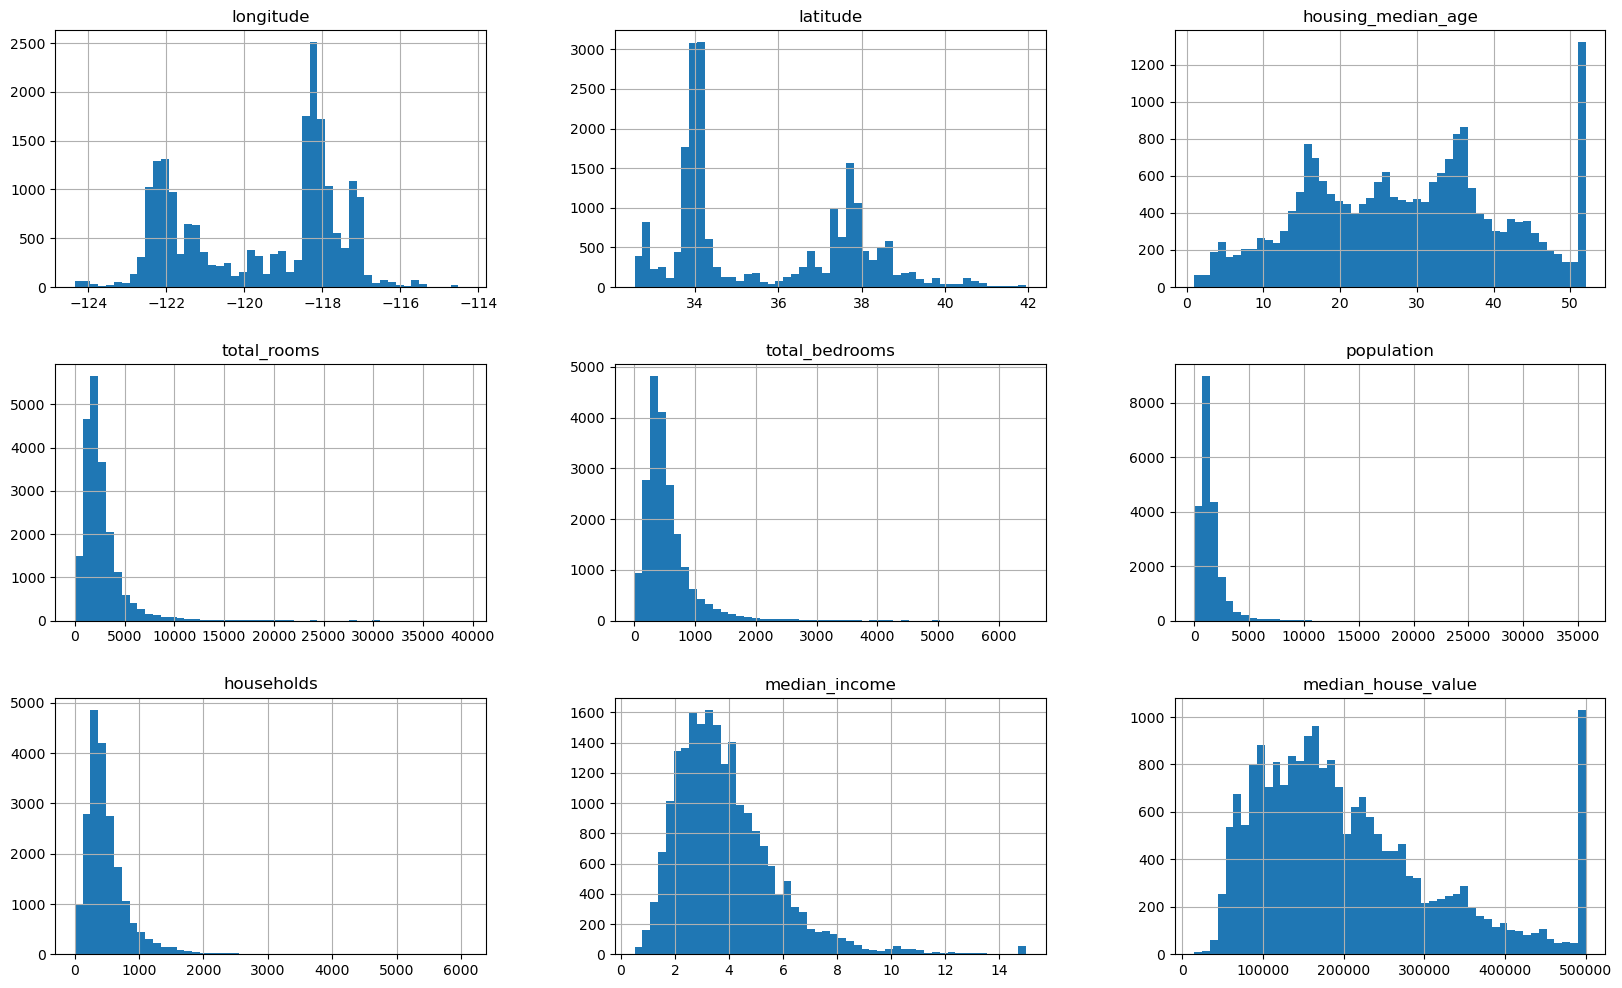

In [116]:
raw.hist(bins = 50, figsize= (20,12))
plt.show()

In [117]:
# In the project, we are going treat all of numerical variables are important equally - 
# no special request from clients or outsider that median_income variable will be more important than others.

# Creating training and test
from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split( raw , test_size= 0.2, random_state = 42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


### Quick visualization
#### Quick Visualization on Geographical data - longitude and latitude

<Axes: xlabel='longitude', ylabel='latitude'>

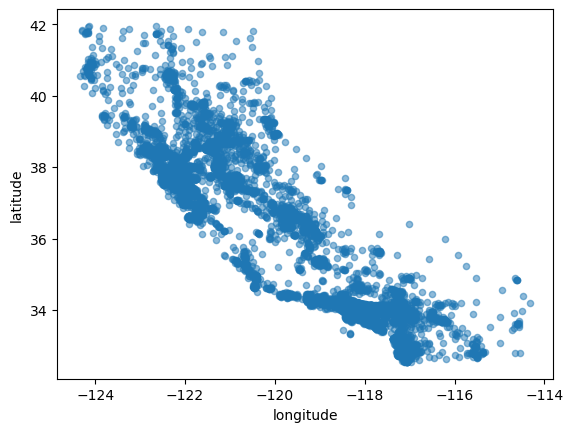

In [118]:
# This looks like California, USA. Most of collected data seem to focus on South of CA and mid of CA
train_set.plot( kind = "scatter" , x ="longitude" , y = "latitude", alpha = 0.5)


<Figure size 640x480 with 0 Axes>

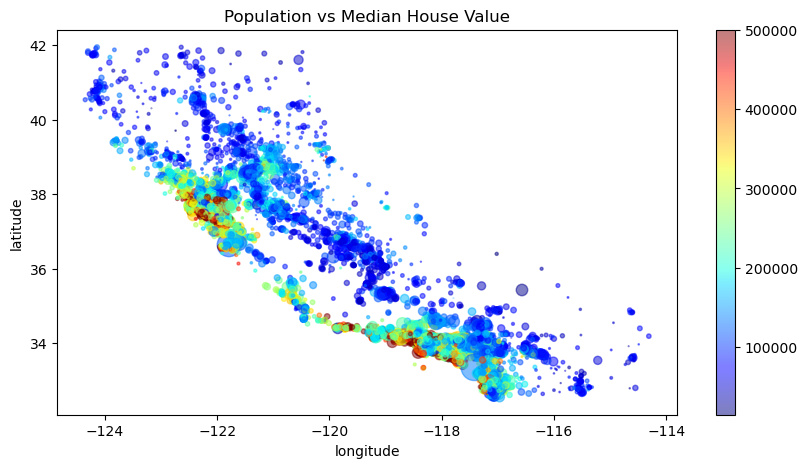

In [119]:
# figure 1 shows that the cheaper house is more inside and expensive close to ocean
plt.figure(1)
train_set.plot(kind = "scatter", x ="longitude", y="latitude", alpha = 0.5,
               s= train_set["population"]/ 100 , c = train_set["median_house_value"],
               cmap = plt.get_cmap("jet"), figsize= (10,5),
                colorbar = True,
                 legend = True,
                  title = "Population vs Median House Value" 
                  )
plt.show()

<Figure size 640x480 with 0 Axes>

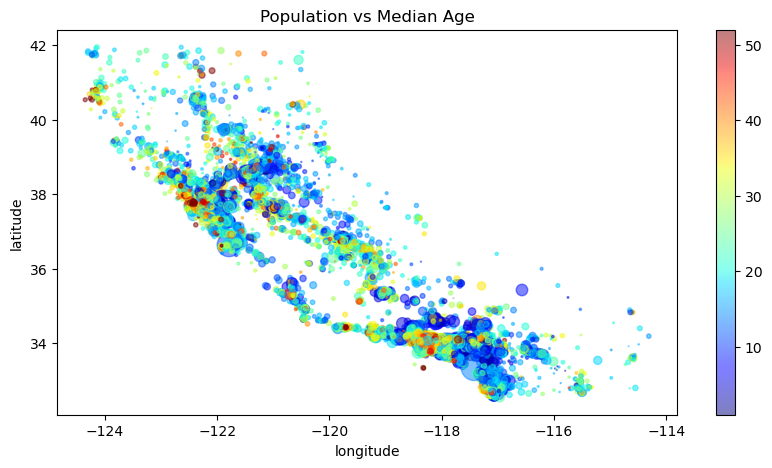

In [120]:
# figure 2 shows that younger people tends to live in south CA more and
plt.figure(2)
train_set.plot(kind = "scatter" , x="longitude" , y="latitude", alpha = 0.5,
               s= train_set["population"] / 100 , c = train_set["housing_median_age"],
                cmap = plt.get_cmap("jet"), figsize = (10,5),
                 colorbar = True,
                 legend = True,
                  title = "Population vs Median Age"
                    )
plt.show()

#### Checking Correlation between data variables
- The quickest way to check is using Pearson Correlation

In [121]:
corr_matrix = train_set.corr()
corr_matrix["median_house_value"] # this shows that median_house_value vs median_income has strong correlation.

/var/folders/0x/1xnpbhzj0zz9vyvqp974pcj80000gn/T/ipykernel_3293/2124423582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_set.corr()


longitude            -0.046349
latitude             -0.142983
housing_median_age    0.103706
total_rooms           0.133989
total_bedrooms        0.047980
population           -0.026032
households            0.063714
median_income         0.690647
median_house_value    1.000000
Name: median_house_value, dtype: float64

- Pearson correlation can be use to detect linear relationship only. What if non-linear relationship pair variable. I can you scatter plot for this

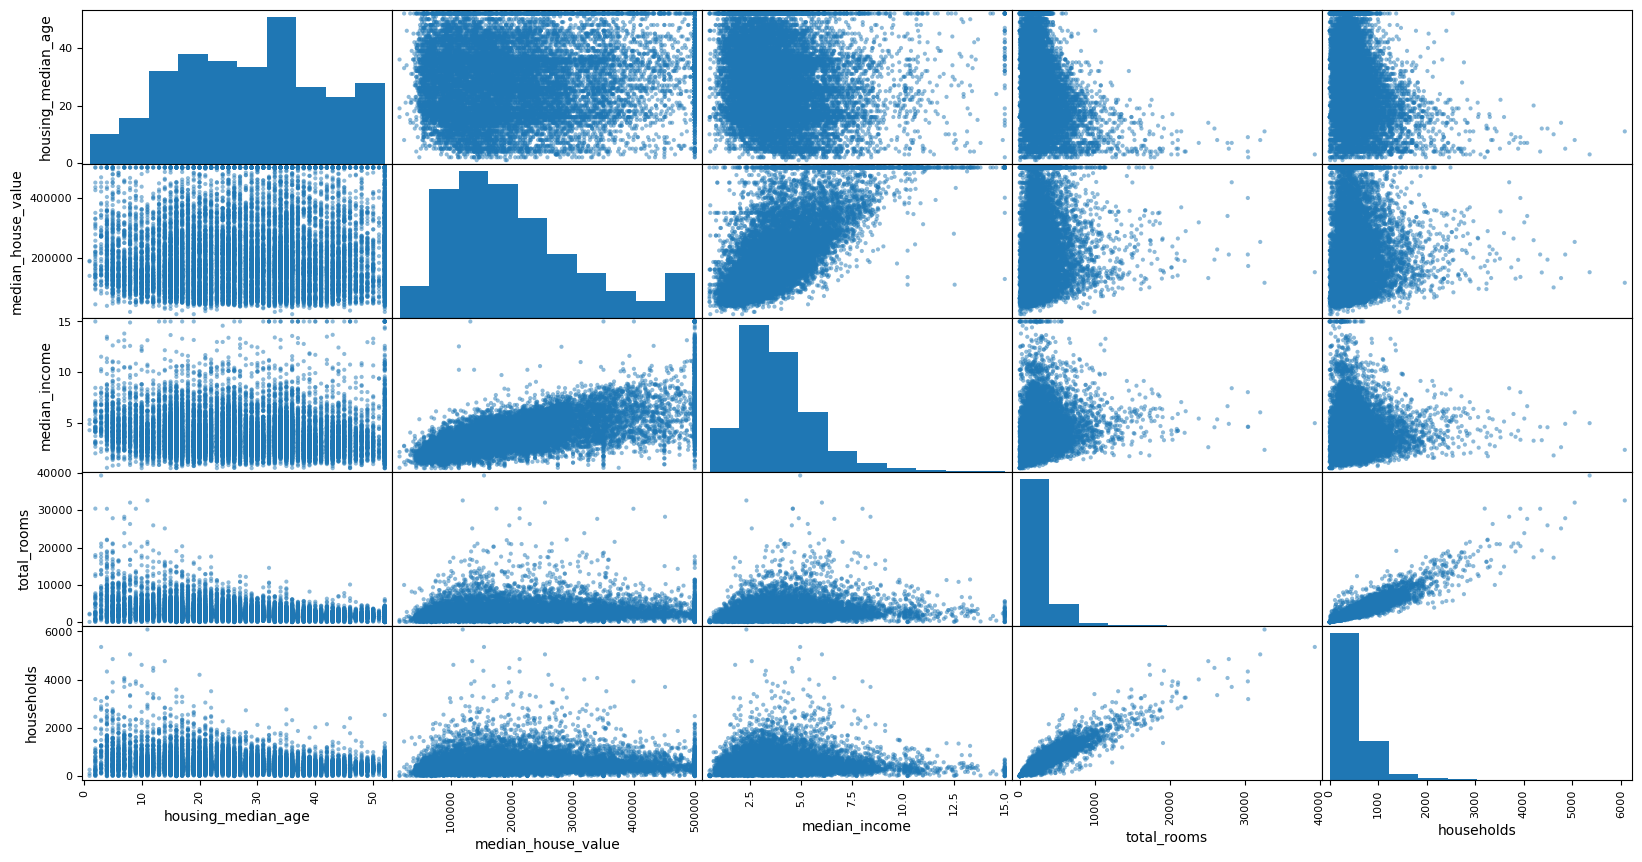

In [122]:
from pandas.plotting import scatter_matrix
# because we have 11 variables, if we plot them all we will have 55 scatter plots. That is not neccessary. We are going to pick revalent variables
# ["housing_median_age", "housing_median_value","median_income","total_room"]
selected_vars = ["housing_median_age", "median_house_value","median_income","total_rooms","households"]
scatter_matrix(train_set[selected_vars], figsize= (20,10) )
plt.show()


### Data Cleaning

<li> Handling Missing Values</li>

In [123]:
from sklearn.impute import SimpleImputer #this library will help to handle missvalue

housing = train_set.copy()
numerical_housing = housing.drop( "ocean_proximity" , axis = 1)

imputer = SimpleImputer(strategy = "median")
imputer.fit(numerical_housing)
print( "imputer median values = : ", imputer.statistics_)

full_num_housing = pd.DataFrame( imputer.transform( numerical_housing ), columns= numerical_housing.columns )
full_num_housing



imputer median values = :  [-1.1851e+02  3.4260e+01  2.9000e+01  2.1290e+03  4.3700e+02  1.1670e+03
  4.1000e+02  3.5458e+00  1.7985e+05]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0
...,...,...,...,...,...,...,...,...,...
16507,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0
16508,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0
16509,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0
16510,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0


<li> Handling Categorical Variable </li>

In [124]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder 

categorical_housing = housing[["ocean_proximity"]]
categorical_housing

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
...,...
11284,<1H OCEAN
11964,INLAND
5390,<1H OCEAN
860,<1H OCEAN


In [125]:
# There are 2 ways to handle categorical variables. Label Encoding or One-Hot Encoding. 
# Label Encoding when we weight every label different. 
# One-Hot Encoding when every label is equal

# Label Encoding:
ordinal = OrdinalEncoder()
ordinal.fit(categorical_housing)
housing_ordinal_encoded = ordinal.fit_transform(categorical_housing)
print("Ordered Labels : ", ordinal.categories_)
housing_ordinal_encoded



Ordered Labels :  [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[4.],
       [4.],
       [4.],
       ...,
       [0.],
       [0.],
       [3.]])

In [126]:
onehot = OneHotEncoder()
onehot.fit(categorical_housing)
housing_one_hot_encoded = onehot.fit_transform(categorical_housing)
print("One_Hot_Labels: ", onehot.categories_)
housing_one_hot_encoded.toarray()

One_Hot_Labels:  [array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

<li>Data Transformation or Custom Data Transformer (Optional in this project)</li>

By creating Custom Data Transformer, we can save a lot of time in cleaning, transforming data. Later, we can integrate that this class with pipeline

In [127]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedroom_ix , population_ix, household_ix = 3,4,5,6

class Combined_Attributes_Adder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X , y=None):
        return self 
    
    def transform(self, X, y=None):
        rooms_per_household = X[:,room_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedroom_ix] / X[:,room_ix]
            return np.c_[ X,rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return  np.c_[X, rooms_per_household, population_per_household]
    
    def get_columns_name(self, attribute_names ):
        if self.add_bedrooms_per_room:
            return list(attribute_names) + ["rooms_per_household", "population_per_household"]
        else:
            return list(attribute_names) + ["rooms_per_household", "population_per_household","bedrooms_per_room"]

# attribute_adder = Combined_Attributes_Adder( add_bedrooms_per_room = False )
# housing_extra_attributes = attribute_adder.transform( housing.values )
# new_cols = attribute_adder.get_columns_name( housing.columns )

# print("Old Housing Data dimension: ", housing.shape)
# print("New Housing Data dimension: ", housing_extra_attributes.shape)
# print("New list of Attributes : ", new_cols)
# print( "New Housing Data with Added Attributes: \n", housing_extra_attributes )

<li>Attribute Scaling and Pipeline </li>

In [128]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attr_pipeline = Pipeline([
        ('imputer' , SimpleImputer(strategy='median' )),
        ('attr_adder' , Combined_Attributes_Adder(add_bedrooms_per_room = False)),
        ('standard_scaler' , StandardScaler())        
])

cat_attr_pipeline = Pipeline([
        ('one_hot_encoder', OneHotEncoder() )
])

# numerical_attr_pipeline.fit(full_num_housing)
# numerical_housing_pipeline = numerical_attr_pipeline.fit_transform(full_num_housing)
# numerical_housing_pipeline

In [138]:
from sklearn.compose import ColumnTransformer

housing_X_train = train_set.drop( columns= ["median_house_value"])


numerical_vars = list(train_set.drop( columns= ["median_house_value","ocean_proximity"]))
cat_vars = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num_vars", num_attr_pipeline , numerical_vars ),
    ("cat_vars", cat_attr_pipeline , cat_vars )
]) 


housing_cleaned = full_pipeline.fit_transform(housing_X_train)
housing_cleaned

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

##### Select  Train a Model

<li>Training Model and Evaluating on Training Dataset</li>

In [224]:
X_train = housing_cleaned.copy()
y_train = train_set[["median_house_value"]]

1. Linear Regression Training

In [141]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit( X_train, y_train)

LinearRegression()

In [142]:
from sklearn.metrics import mean_squared_error

y_LR_pred = lin_reg.predict(X_train)
LR_mse = mean_squared_error(y_true= y_train, y_pred= y_LR_pred )
LR_rmse = np.sqrt(LR_mse)

print("Linear Regression RMSE: " , LR_rmse)

Linear Regression RMSE:  68329.87371986113


2. Decision Tree Regression

In [143]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [144]:
y_tree_pred = tree_reg.predict(X_train)

tree_reg_mse = mean_squared_error(y_true= y_train, y_pred= y_tree_pred)
tree_reg_rmse = np.sqrt(tree_reg_mse)
print("Tree Regression RMSE: ", tree_reg_rmse)

Tree Regression RMSE:  0.0


3. Random Forest Regression

In [147]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)


/var/folders/0x/1xnpbhzj0zz9vyvqp974pcj80000gn/T/ipykernel_3293/1412702011.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [148]:
y_forest_reg_pred = forest_reg.predict(X_train)

forest_reg_mse = mean_squared_error(y_train, y_forest_reg_pred)
forest_reg_rmse = np.sqrt(forest_reg_mse)
print("Random Forest Regression: ", forest_reg_rmse)

Random Forest Regression:  18454.437917731768


##### Tree Regression RMSE is zero. This indicates that the Tree Regression model was overfitting with Training Data.
<li>Using Cross-Validation for Better Evaluation</li>

In [145]:
# Linear Regression - Cross validation evaluation

from sklearn.model_selection import cross_val_score
def display_scores(scores, model_name):
    print("MODEL : ", model_name)
    print("RMSE Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation: ", scores.std())


LR_scores = cross_val_score(lin_reg, X_train , y_train, scoring="neg_root_mean_squared_error", cv= 10 )
display_scores(LR_scores, "Linear Regression")


MODEL :  Linear Regression
RMSE Scores :  [-65601.01689098 -71627.20418119 -68038.38722887 -66987.28199265
 -69394.1236065  -66115.0624049  -65908.87195323 -69281.69706496
 -72885.82145152 -69751.44015401]
Mean :  -68559.09069288042
Standard Deviation:  2350.8276319965616


In [146]:
# Decision Tree Regression - Cross Validation

tree_reg_scores = cross_val_score( tree_reg , X_train, y_train, scoring= "neg_root_mean_squared_error", cv=10)
display_scores(tree_reg_scores, "Decision Tree Regression")

MODEL :  Decision Tree Regression
RMSE Scores :  [-65267.58788069 -69084.2611484  -71873.31010742 -69979.84556556
 -71341.81811046 -68620.44981146 -67410.98229259 -65843.45815176
 -71216.64711942 -72577.43916085]
Mean :  -69321.57993486084
Standard Deviation:  2407.2467977775173


In [150]:
# Random Forest Regression - Cross Validation

forest_reg_scores = cross_val_score( forest_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv = 10)
display_scores(forest_reg_scores,"Random Forest Regression")

/Users/dungnguyen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dungnguyen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dungnguyen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/dungnguyen/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

MODEL :  Random Forest Regression
RMSE Scores :  [-46503.43637547 -51740.63737923 -49787.35163997 -52241.88267726
 -52426.0296623  -47253.59596337 -47580.52507013 -50615.73261801
 -49881.28160192 -50591.97044261]
Mean :  -49862.24434302792
Standard Deviation:  2004.074111167949


<p>After running quick training and evaluation with cross validation on different 3 models : Linear Regression, Decision Tree Regression and Random Forest Regression. 
It shows that Random Forest Regression has the highest score.
This shows that Random Forest Regression is the most promising model on this particular dataset and problem.</p>

##### Fine-Tune Model
<li>1. Grid Search</li>


In [156]:
# After running 3 different models, we can see that Random forest Regression is the most promosing model that should have more training by doing fine-tune. 
# By doing Grid Search, all we need to do is to tell which hyperparameters that GridSearchCV should try. 

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [ 3,10,30,35,40,50,75] , 'max_features' : [2,4,6,8,10,12,14]}, # telling to try this first with Boostrap is TRUE. this will give us 3x7 = 21 models
    {'bootstrap' : [False], 'n_estimators' : [ 3,10], 'max_features' : [2,4,6,8,10,12] }
]

forest_reg = RandomForestRegressor()
forest_reg_GridSearch = GridSearchCV( forest_reg, param_grid, scoring= "neg_root_mean_squared_error", cv = 5, return_train_score = True )
forest_reg_GridSearch.fit(X_train, y_train)




GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12, 14],
                          'n_estimators': [3, 10, 30, 35, 40, 50, 75]},
                         {'bootstrap': [False],
                          'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [157]:
# Getting the best hypeparamenters for the model
forest_reg_GridSearch.best_params_

{'max_features': 6, 'n_estimators': 75}

In [184]:
# Getting the mean rmse score from best hyperparameters
 
forest_result = forest_reg_GridSearch.cv_results_

# index = np.where(forest_result["mean_test_score"] == max(forest_result["mean_test_score"]))[0][0]
# list(forest_result["params"])[20]
print("the best mean RMSE score : ", max(forest_result["mean_test_score"] ) )
print("Hyperparameter for best RMSE : ", forest_reg_GridSearch.best_params_)


the best mean RMSE score :  -48899.813746526095
Hyperparameter for best RMSE :  {'max_features': 6, 'n_estimators': 75}


In [190]:
# In this step, what we can do is to determine less important variables and drop it

forest_reg_GridSearch.best_estimator_.feature_importances_

array([7.90410894e-02, 7.64508951e-02, 4.29458278e-02, 2.00378333e-02,
       1.83995434e-02, 1.87997973e-02, 1.74453251e-02, 3.63165529e-01,
       7.93886155e-02, 1.09945646e-01, 9.63626789e-03, 1.56183154e-01,
       2.12596836e-04, 3.40862314e-03, 4.93925621e-03])

#### Evaluating on Test set

In [218]:
final_model = forest_reg_GridSearch.best_estimator_
final_model

RandomForestRegressor(max_features=6, n_estimators=75)

In [221]:
housing_X_test = test_set.drop( columns= ["median_house_value"])


numerical_vars = list(test_set.drop( columns= ["median_house_value","ocean_proximity"]))
cat_vars = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num_vars", num_attr_pipeline , numerical_vars ),
    ("cat_vars", cat_attr_pipeline , cat_vars )
]) 


housing_cleaned_test = full_pipeline.fit_transform(housing_X_test)
housing_cleaned_test

array([[ 0.25541734,  0.22194113, -0.30073951, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02976613, -0.20947715,  0.098724  , ...,  0.        ,
         0.        ,  0.        ],
       [-1.46454628,  1.03788441,  1.85636346, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.2689819 ,  0.80810728, -0.30073951, ...,  0.        ,
         0.        ,  0.        ],
       [-0.120668  ,  0.5548835 ,  0.57808022, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.57634349, -0.64089543, -0.93988113, ...,  0.        ,
         0.        ,  0.        ]])

In [223]:
X_test = housing_cleaned_test.copy()
y_test = test_set[["median_house_value"]]

In [225]:
y_test_pred = final_model.predict(X_test)
final_model_mse = mean_squared_error( y_true= y_test, y_pred= y_test_pred )
final_model_rmse = np.sqrt(final_model_mse)

print("RMSE - Final model :" , final_model_rmse)

RMSE - Final model : 66349.06097320777
